# Tests for Portfolio VaR Functions

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf

# Import functions
import portfolio_var as pv
import plots as pl
import data_download as dd

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

In [2]:
# Set parameters
confidence_level = 0.99
holding_period = 1

In [3]:
# Define shares directly (tickers inferred from index)
shares = pd.Series({
    "AAPL": 10,
    "MSFT": 5,
    "NVDA": 8,
    "GOOGL": 6,
    "JPM": 7,
    "UNH": 4,
    "KO": 12,
    "PEP": 5,
    "BMW.DE": -3,     # short
    "NESN.SW": 0.2,   # fractional
    "NOVN.SW": 1.5,
    "ASML.AS": 2
})

# Download prices for the tickers in 'shares'
tickers = shares.index.tolist()
prices = dd.get_raw_prices(tickers, start="2022-01-01")

# Convert prices to base currency (e.g. CHF)
prices_converted = dd.convert_to_base(prices, base="CHF")

# Create portfolio with monetary positions
position_data = dd.create_portfolio(prices_converted, shares)

# Compute returns and summary stats
returns, mean_returns, covariance_matrix = dd.summary_statistics(position_data)

# Display
final_value = position_data.sum(axis=1).iloc[-1]
print(f"\nPortfolio final value in CHF: {final_value:.2f}")
print("\nSample of daily returns:\n", returns.head())
print("\nMean returns (daily, in CHF):\n", mean_returns)
print("\nCovariance matrix (in CHF):\n", covariance_matrix)


[currency detection] AAPL: USD
[currency detection] ASML.AS: EUR
[currency detection] BMW.DE: EUR
[currency detection] GOOGL: USD
[currency detection] JPM: USD
[currency detection] KO: USD
[currency detection] MSFT: USD
[currency detection] NESN.SW: CHF
[currency detection] NOVN.SW: CHF
[currency detection] NVDA: USD
[currency detection] PEP: USD
[currency detection] UNH: USD
[fx download] Downloading FX pairs: CHFEUR=X, CHFUSD=X
[conversion] AAPL: USD → CHF via CHFUSD=X
[conversion] ASML.AS: EUR → CHF via CHFEUR=X
[conversion] BMW.DE: EUR → CHF via CHFEUR=X
[conversion] GOOGL: USD → CHF via CHFUSD=X
[conversion] JPM: USD → CHF via CHFUSD=X
[conversion] KO: USD → CHF via CHFUSD=X
[conversion] MSFT: USD → CHF via CHFUSD=X
[conversion] NVDA: USD → CHF via CHFUSD=X
[conversion] PEP: USD → CHF via CHFUSD=X
[conversion] UNH: USD → CHF via CHFUSD=X

Portfolio final value in CHF: 10384.96

Sample of daily returns:
                 AAPL   ASML.AS    BMW.DE     GOOGL       JPM        KO  \
Date

In [4]:
position_data.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-03,1629.203525,1405.115070,-229.284607,789.596675,938.395609,588.583206,1484.854004,23.019711,97.372501,219.371740,717.262177,1747.324106
2022-01-04,1619.735177,1365.095111,-236.608501,791.852592,980.756766,602.579438,1469.562374,23.069591,97.542206,214.806067,723.304304,1719.636023
2022-01-05,1573.010768,1338.897954,-240.794360,753.781242,960.603849,606.174158,1409.886775,22.446088,98.305859,201.973961,724.092283,1711.436991
2022-01-06,1548.743933,1319.233699,-241.675322,754.601397,972.059719,603.759874,1400.547424,22.396208,98.911938,206.439395,725.191596,1643.512635
2022-01-07,1557.050987,1335.918440,-240.814400,753.880462,985.982071,604.994997,1407.386474,22.171747,99.069523,200.491147,729.283260,1611.858484


In [5]:
# Compute and display the summary
summary_df = pv.var_asset_normal(position_data)

In [6]:
summary_df.head()

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2022-01-04,280.292096,420.478242,140.186145
2022-01-05,272.797262,410.082467,137.285205
2022-01-06,269.830492,405.172714,135.342222
2022-01-07,270.255735,405.579879,135.324143
2022-01-10,267.887655,401.363047,133.475392


### Marginal VaR

In [7]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [8]:
marginal_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.036824,0.032947,0.011676,0.037120,0.025341,0.013828,0.035259,0.004284,0.004121,0.055411,0.014279,0.024021
2022-01-05,0.036730,0.032874,0.011624,0.036924,0.025356,0.013936,0.035113,0.004333,0.004194,0.055064,0.014394,0.024311
2022-01-06,0.036793,0.032920,0.011643,0.037041,0.025451,0.013927,0.035200,0.004320,0.004171,0.055299,0.014385,0.024019
2022-01-07,0.036834,0.033098,0.011723,0.037066,0.025495,0.013912,0.035227,0.004328,0.004170,0.055338,0.014364,0.023796
2022-01-10,0.036908,0.032342,0.011478,0.037138,0.025554,0.014017,0.035271,0.004300,0.004152,0.055156,0.014495,0.024110


### Incremental, Component and Relative Component VaR

In [9]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [10]:
component_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,59.645703,44.976271,-2.762645,29.393655,24.853064,8.332617,51.815329,0.098833,0.401961,11.902670,10.327847,41.306791
2022-01-05,57.777409,44.014775,-2.798952,27.832584,24.357255,8.447732,49.505383,0.097265,0.412331,11.121438,10.422934,41.607108
2022-01-06,56.983147,43.428647,-2.813809,27.951293,24.740373,8.408467,49.299467,0.096760,0.412513,11.415803,10.431632,39.476199
2022-01-07,57.352140,44.215598,-2.822949,27.943270,25.137783,8.416396,49.578452,0.095967,0.413081,11.094847,10.475290,38.355858
2022-01-10,57.314501,40.535598,-2.816983,28.256621,25.149679,8.470936,49.538482,0.093376,0.414644,11.089541,10.547090,39.294170


In [11]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [12]:
rcvar_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.212798,0.160462,-0.009856,0.104868,0.088668,0.029728,0.184862,0.000353,0.001434,0.042465,0.036847,0.147371
2022-01-05,0.211796,0.161346,-0.010260,0.102027,0.089287,0.030967,0.181473,0.000357,0.001511,0.040768,0.038208,0.152520
2022-01-06,0.211181,0.160948,-0.010428,0.103588,0.091689,0.031162,0.182705,0.000359,0.001529,0.042307,0.038660,0.146300
2022-01-07,0.212214,0.163607,-0.010445,0.103396,0.093015,0.031142,0.183450,0.000355,0.001528,0.041053,0.038761,0.141924
2022-01-10,0.213950,0.151316,-0.010516,0.105479,0.093881,0.031621,0.184923,0.000349,0.001548,0.041396,0.039371,0.146682


In [ ]:
# Define change in position
change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0]  

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [14]:
ivar_series.head()

Date
2022-01-04    329.473536
2022-01-05    328.738831
2022-01-06    329.196012
2022-01-07    330.975282
2022-01-10    323.421273
dtype: float64

## ES Test

In [15]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = pv.marginal_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [16]:
marginal_es_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.042188,0.037747,0.013377,0.042527,0.029032,0.015843,0.040395,0.004908,0.004721,0.063483,0.016359,0.027520
2022-01-05,0.042081,0.037662,0.013317,0.042302,0.029050,0.015966,0.040228,0.004964,0.004805,0.063085,0.016491,0.027852
2022-01-06,0.042153,0.037715,0.013339,0.042437,0.029159,0.015955,0.040328,0.004950,0.004778,0.063354,0.016480,0.027518
2022-01-07,0.042199,0.037919,0.013430,0.042465,0.029209,0.015938,0.040359,0.004959,0.004777,0.063399,0.016456,0.027262
2022-01-10,0.042284,0.037053,0.013149,0.042548,0.029276,0.016059,0.040409,0.004926,0.004757,0.063191,0.016606,0.027622


In [17]:
# Compute and display Component VaR (styled table)
component_es_df = pv.component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [18]:
component_es_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,68.333966,51.527718,-3.165064,33.675268,28.473274,9.546383,59.362984,0.113229,0.460512,13.636466,11.832248,47.323725
2022-01-05,66.193528,50.426166,-3.206660,31.886804,27.905243,9.678266,56.716561,0.111433,0.472393,12.741436,11.941185,47.667788
2022-01-06,65.283569,49.754660,-3.223681,32.022805,28.344167,9.633282,56.480650,0.110855,0.472602,13.078680,11.951151,45.226481
2022-01-07,65.706312,50.656242,-3.234152,32.013613,28.799466,9.642367,56.800273,0.109947,0.473253,12.710972,12.001168,43.942946
2022-01-10,65.663190,46.440196,-3.227318,32.372609,28.813094,9.704851,56.754481,0.106977,0.475043,12.704894,12.083426,45.017937


In [19]:
res_df = pv.relative_component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [20]:
res_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.212798,0.160462,-0.009856,0.104868,0.088668,0.029728,0.184862,0.000353,0.001434,0.042465,0.036847,0.147371
2022-01-05,0.211796,0.161346,-0.010260,0.102027,0.089287,0.030967,0.181473,0.000357,0.001511,0.040768,0.038208,0.152520
2022-01-06,0.211181,0.160948,-0.010428,0.103588,0.091689,0.031162,0.182705,0.000359,0.001529,0.042307,0.038660,0.146300
2022-01-07,0.212214,0.163607,-0.010445,0.103396,0.093015,0.031142,0.183450,0.000355,0.001528,0.041053,0.038761,0.141924
2022-01-10,0.213950,0.151316,-0.010516,0.105479,0.093881,0.031621,0.184923,0.000349,0.001548,0.041396,0.039371,0.146682


In [ ]:
# Define change in position
change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0] 

# Compute and display Incremental VaR
ies_series = pv.incremental_es(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [22]:
ies_series.head()

Date
2022-01-04    377.466140
2022-01-05    376.624415
2022-01-06    377.148192
2022-01-07    379.186638
2022-01-10    370.532277
dtype: float64

### Visualizations


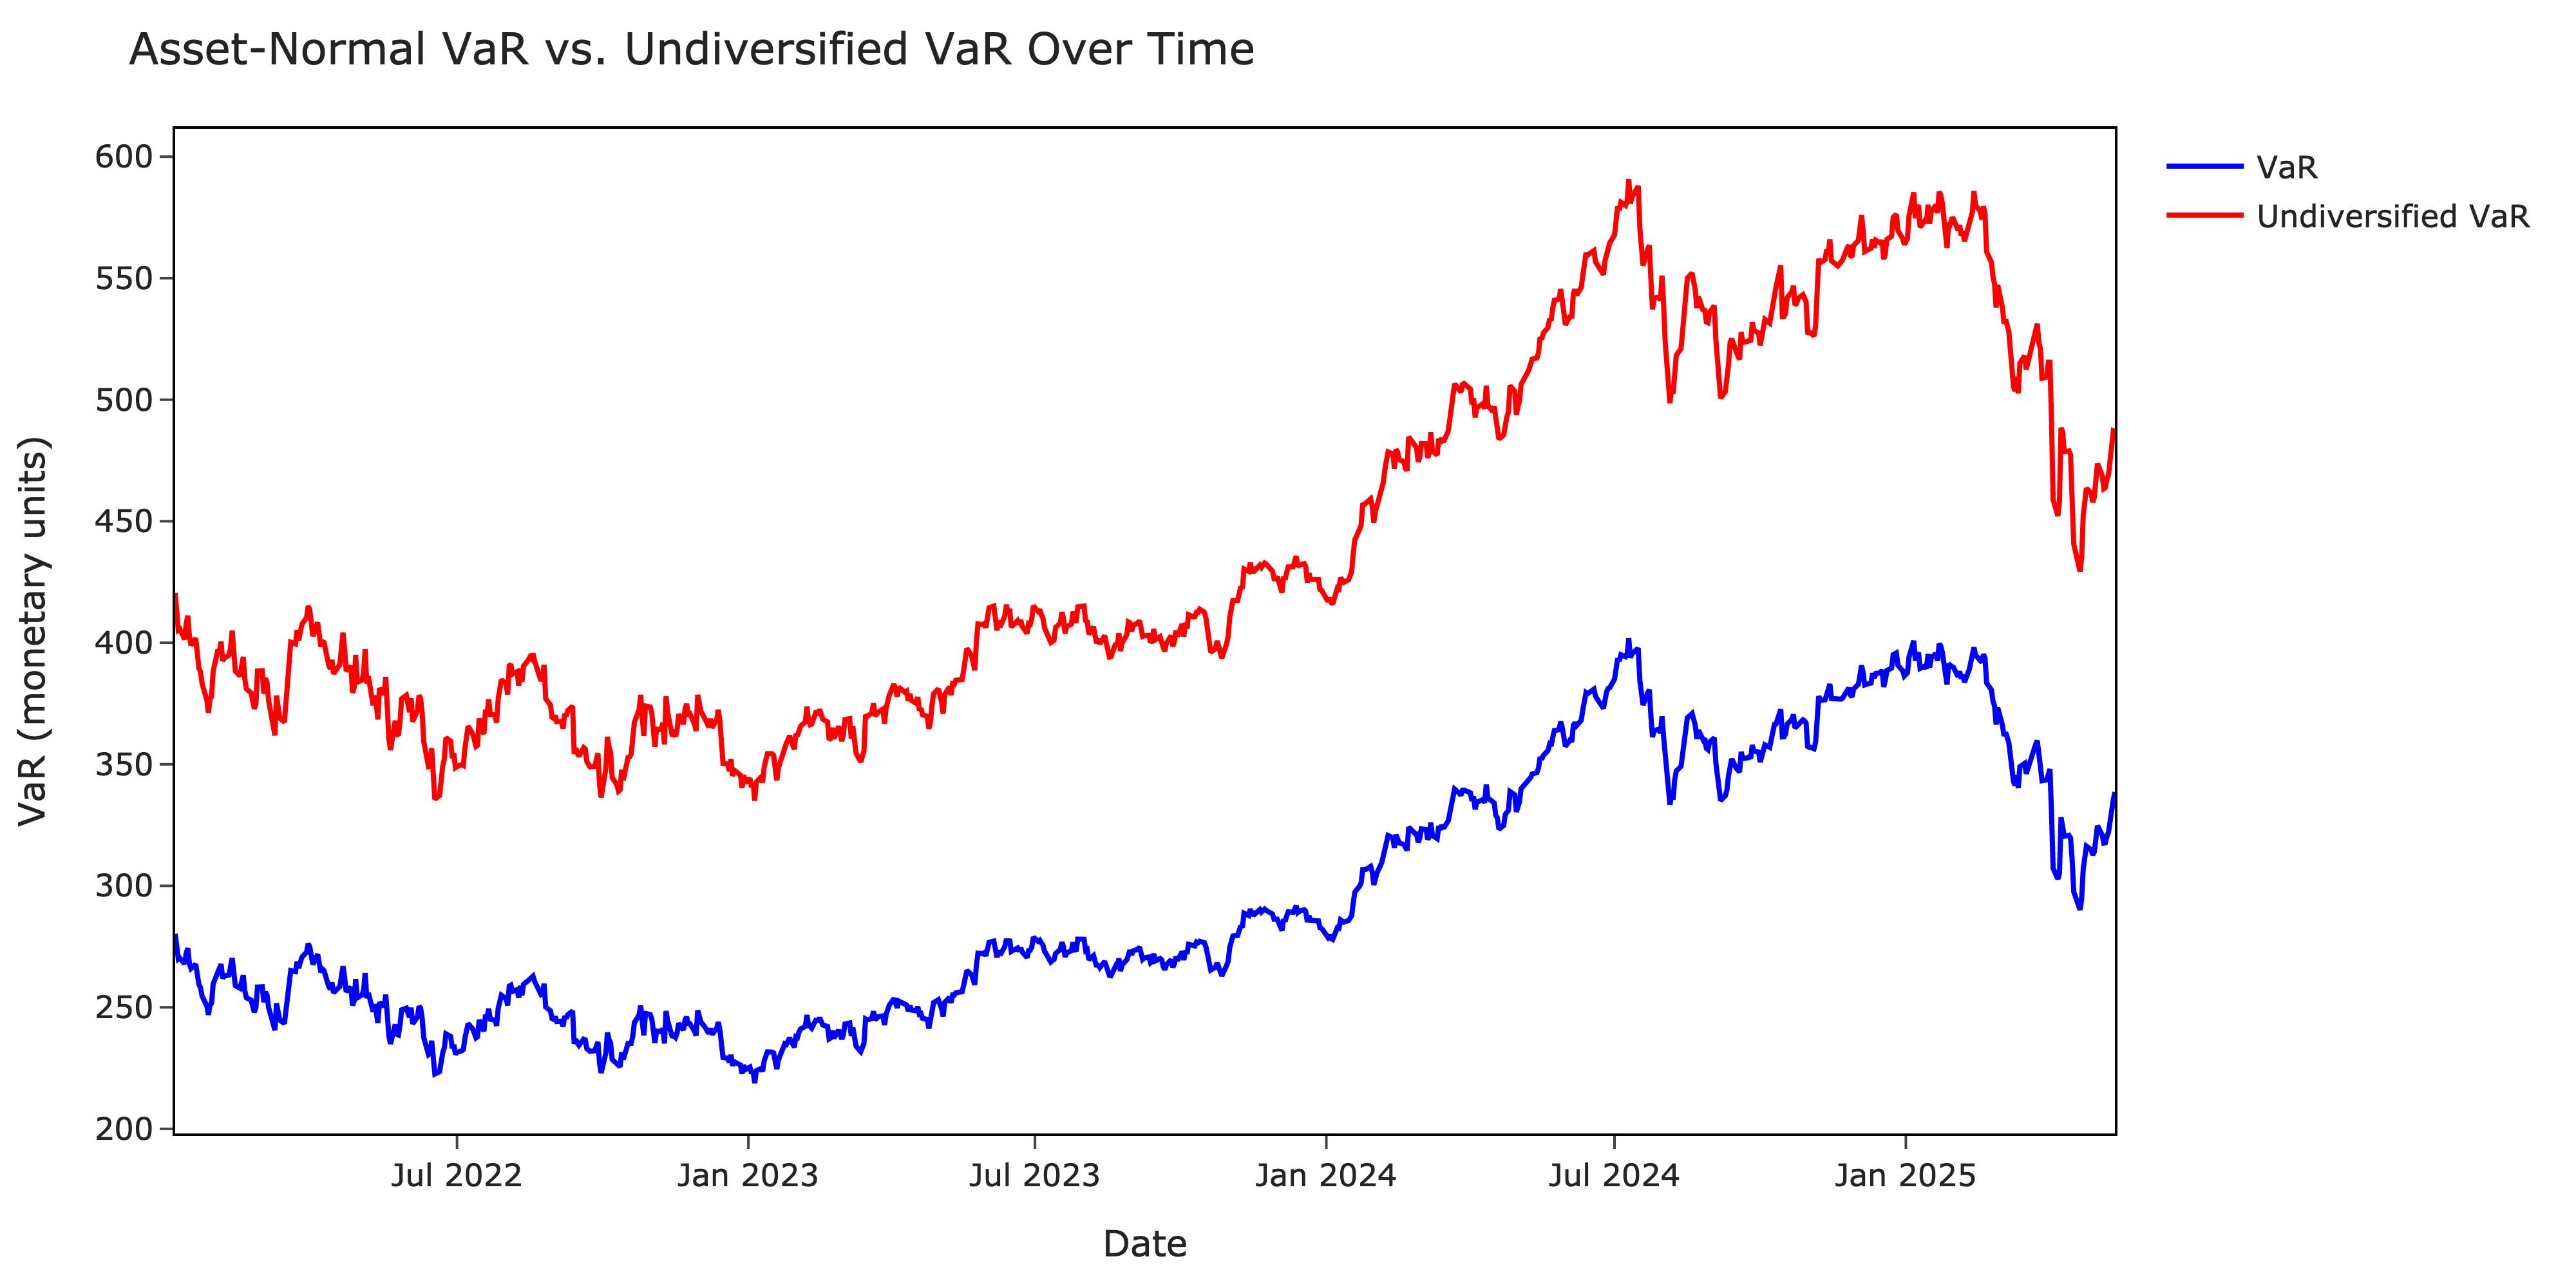

In [27]:
pl.plot_var_series(summary_df, interactive=False)


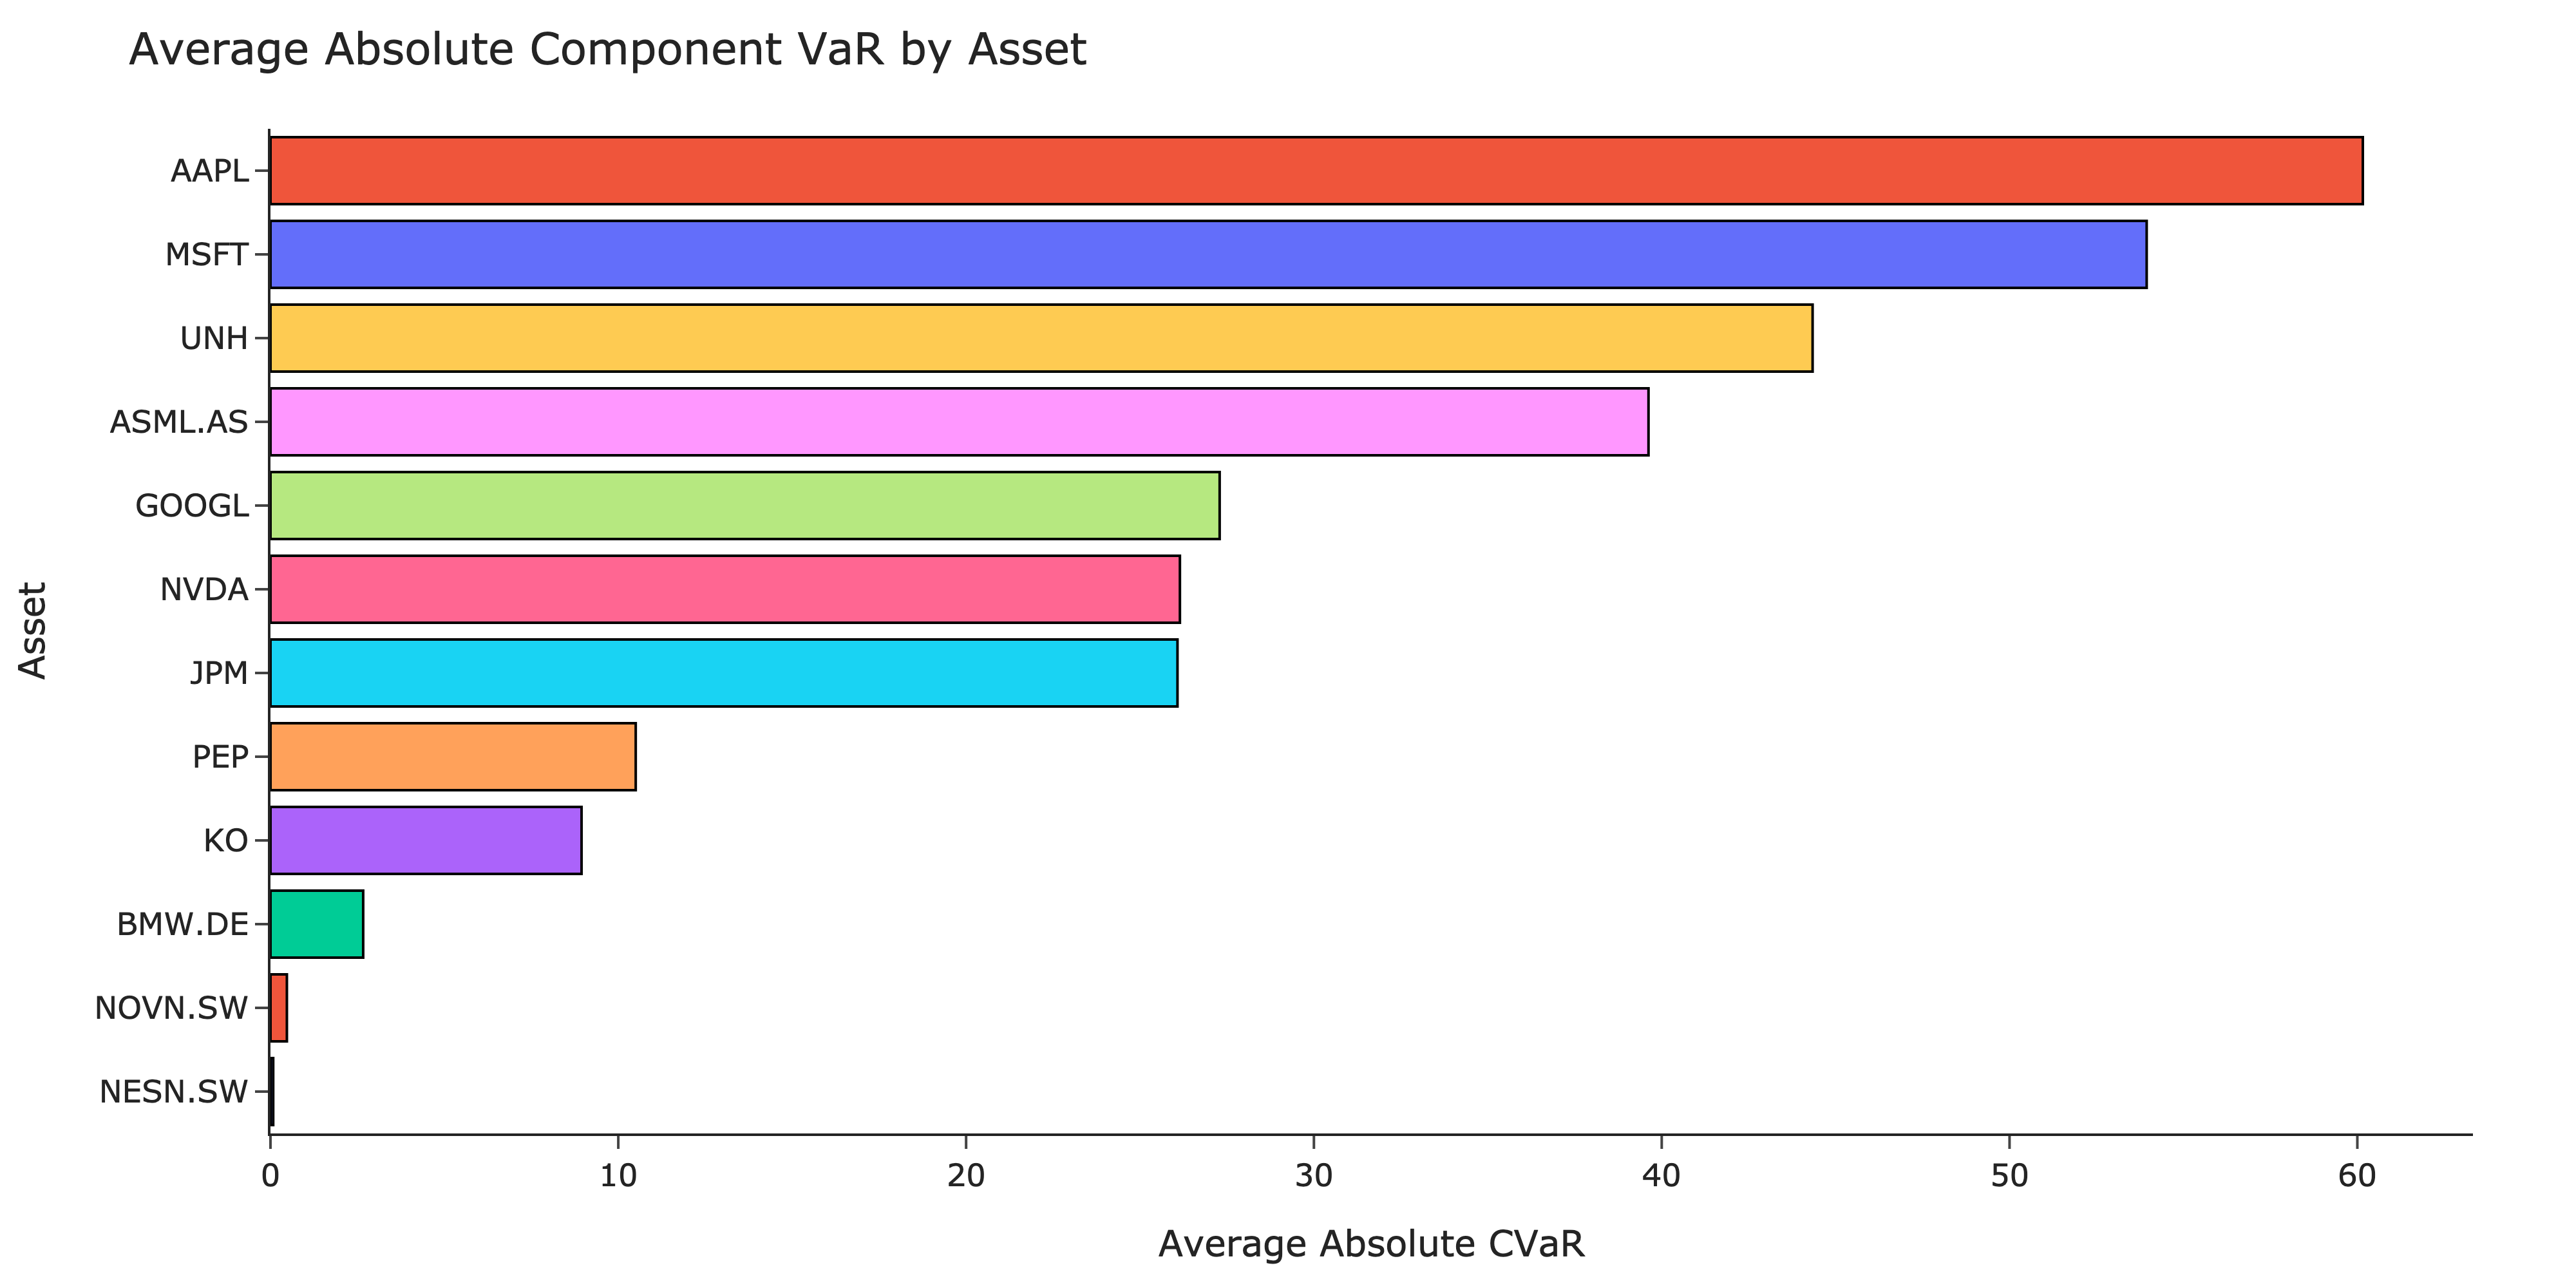

In [28]:
pl.plot_risk_contribution_bar(component_df, interactive=False)


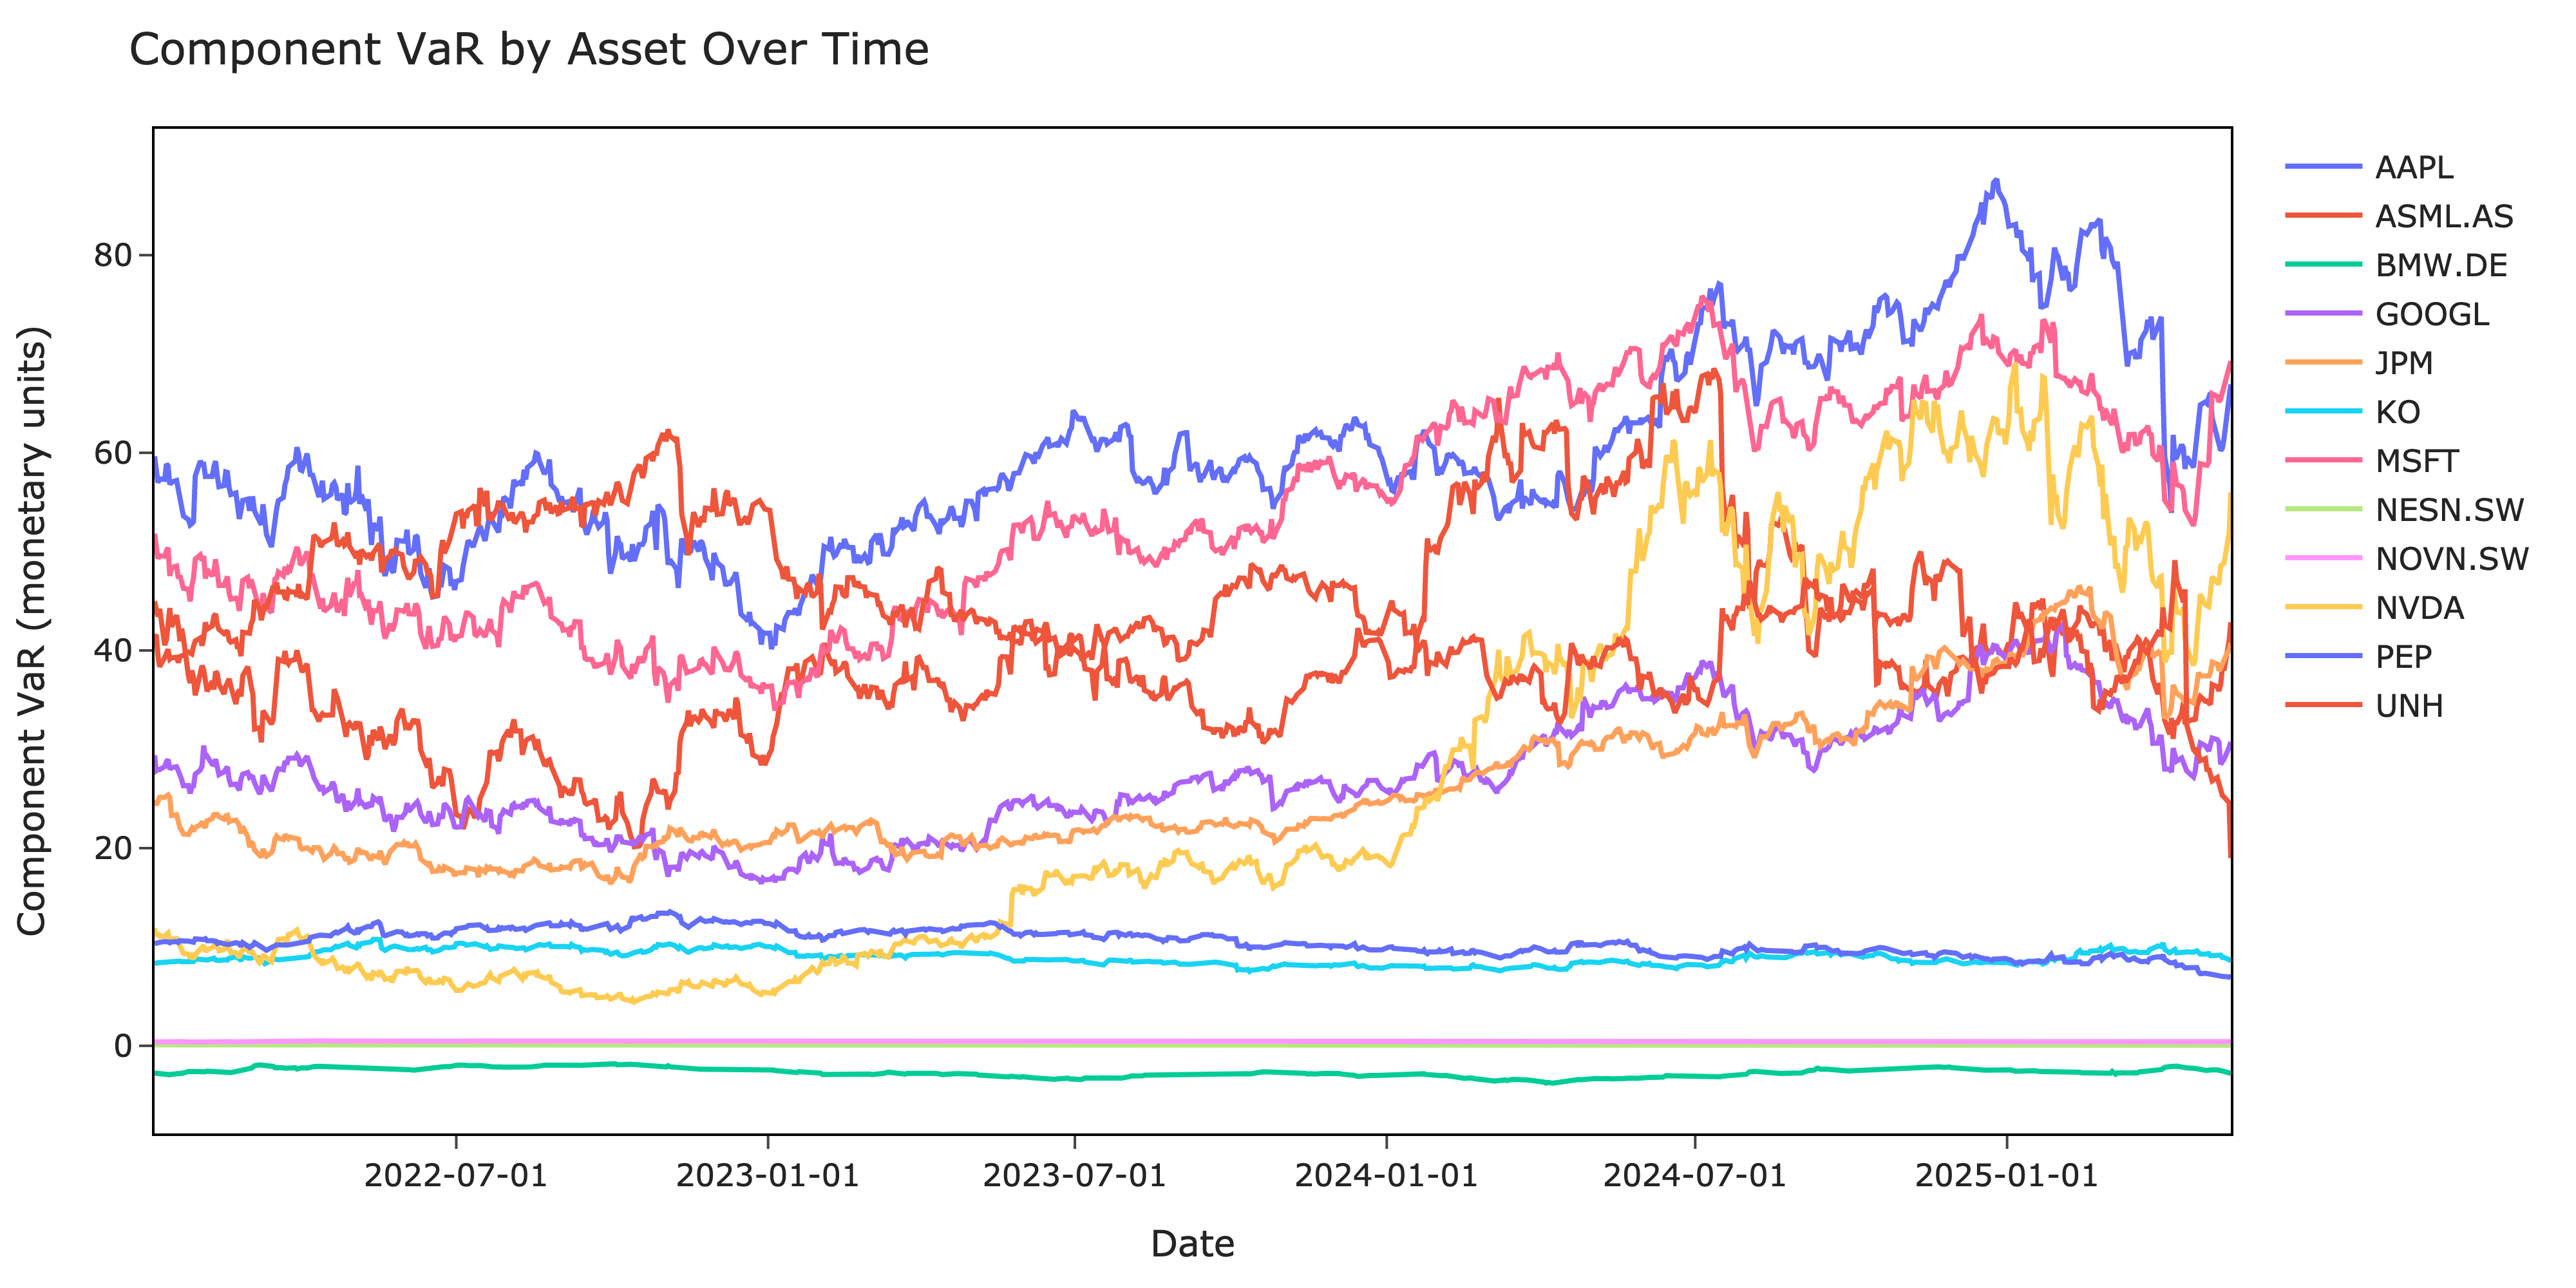

In [29]:
pl.plot_risk_contribution_lines(component_df, interactive=False)


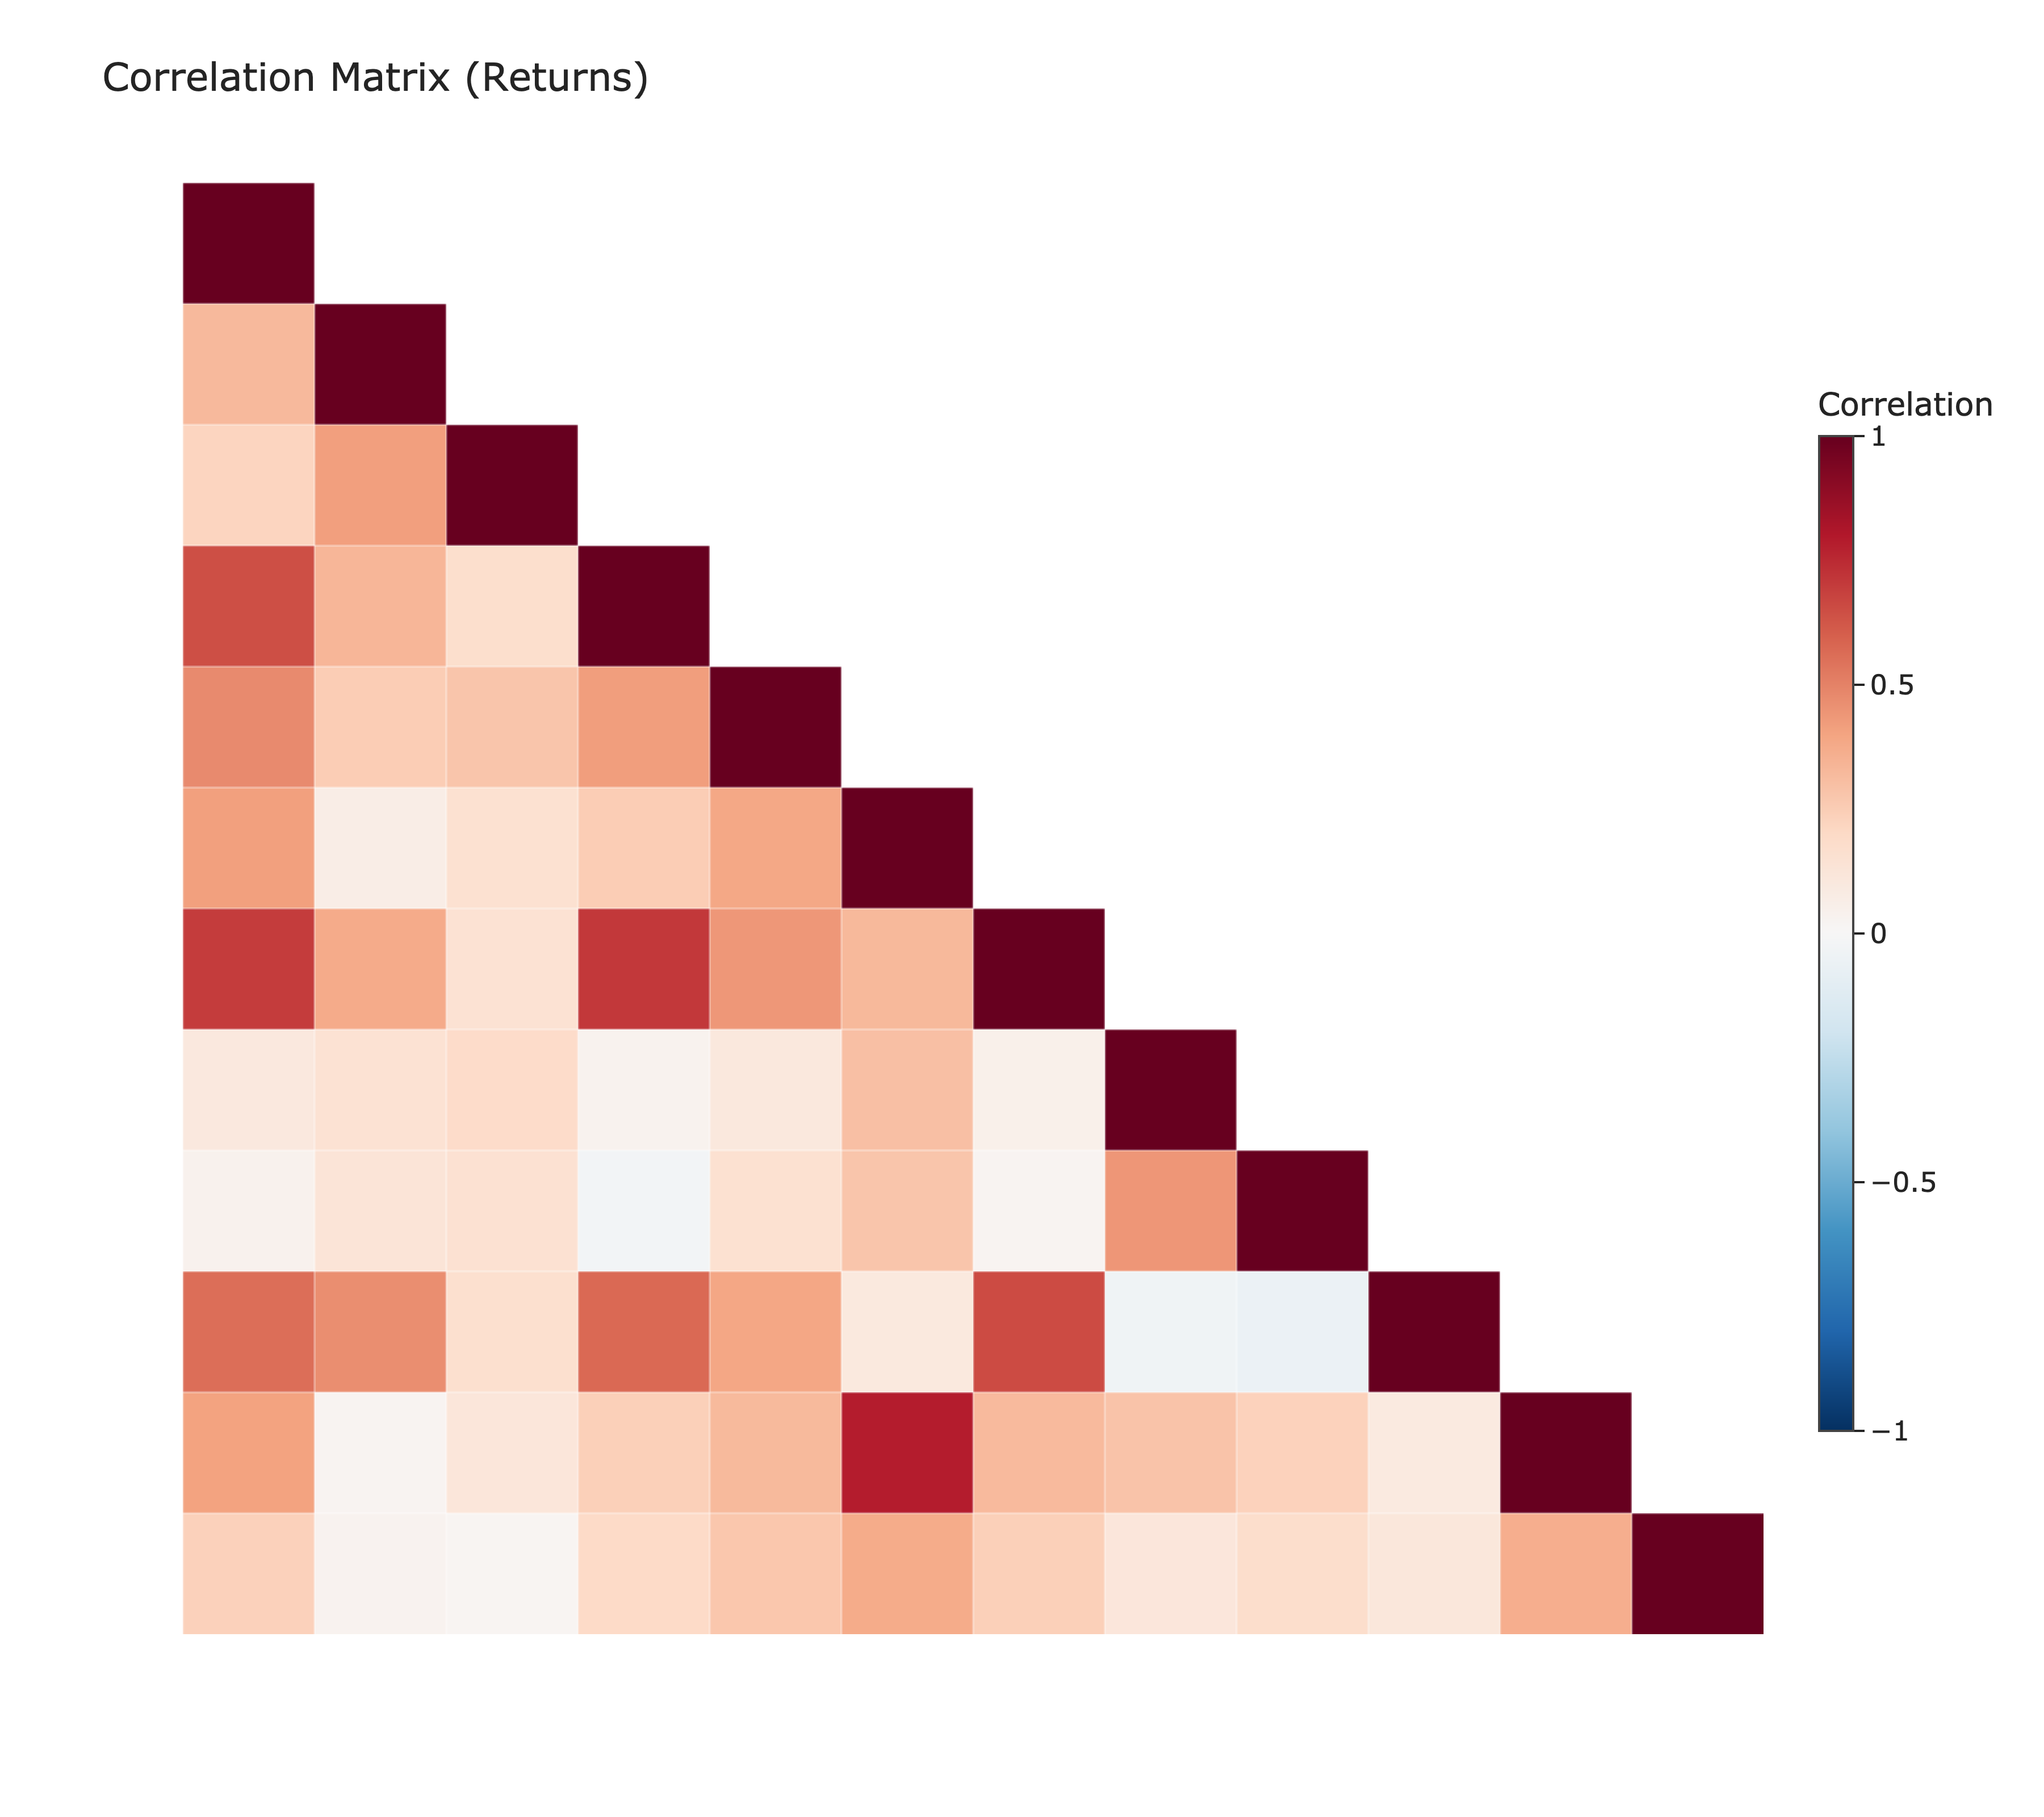

In [30]:
pl.plot_correlation_matrix(position_data, interactive=False)

---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.